# Подготовка данных

Загрузка данных из txt файла


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# genfromtxt() - загрузка данных из txt файла
# dtype - тип получаемых данных, в файле находятся целые числа
# delimiter - разделитель, по которому данные будут группироваться, в данном случае запятая
# skip_header - пропуск строчек в начале файла, нам нужно пропустить 1 строчку
data = np.genfromtxt("ex1data2.txt", dtype='uint64', delimiter=",", skip_header=1)

# загрузка данных в разные списки
square = data[:,0]
rooms = data[:,1]
cost = data[:,2]

Функция для вычисления ошибки

In [4]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

# Ход выполнения задания

1. Визуализация данных

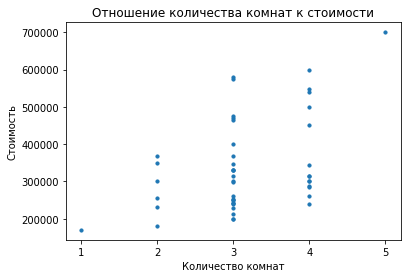

In [13]:
# построение графика - отношение кол-ва комнат к стоимости
plt.scatter(rooms, cost, s=10)

# подписи графика
plt.title('Отношение количества комнат к стоимости')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')

# значения по оси x - комнат может быть от 1 до 5 включительно
plt.xticks([i for i in range(1, 6)])
plt.show()

2. Линейная модель, которая учитывала бы только размер жилья

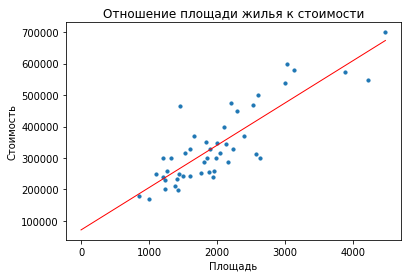

Ошибка модели: 1.9346e+11


In [14]:
# обучение модели
f1p, residuals, rank, sv, rcond = np.polyfit(square, cost, 1, full=True)
f1 = np.poly1d(f1p)
# linspace - линейное пространство 
# аргументы - start, stop
fx = np.linspace(0, max(square)) 

# визуализация модели
plt.scatter(square, cost, s=10)
plt.plot(fx, f1(fx), linewidth=1.0, color='r')
plt.title('Отношение площади жилья к стоимости')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()


print(f"Ошибка модели: {error(f1, square, cost):.5}")

3. Полиномиальная модель (степени 2 и 3), учитывающая только размер жилья.

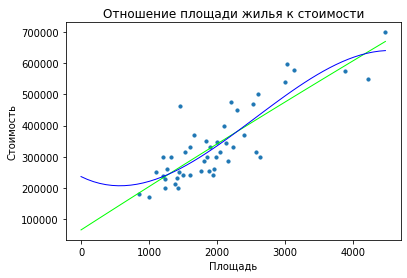

Ошибка модели (степень 2): 1.9342e+11
Ошибка модели (степень 3): 1.8844e+11


In [15]:
# Обучение моделей
f2p, residuals, rank, sv, rcond = np.polyfit(square, cost, 2, full=True)
f2 = np.poly1d(f2p)

f3p, residuals, rank, sv, rcond = np.polyfit(square, cost, 3, full=True)
f3 = np.poly1d(f3p)

# визуализация моделей
plt.scatter(square, cost, s=10)
plt.plot(fx, f2(fx), linewidth=1.0, color='lime')
plt.plot(fx, f3(fx), linewidth=1.0, color='blue')
plt.title('Отношение площади жилья к стоимости')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

# вычисление ошибки
print(f"Ошибка модели (степень 2): {error(f2, square, cost):.5}")
print(f"Ошибка модели (степень 3): {error(f3, square, cost):.5}")

4. Линейная модель (с помощью scikit-learn), которая учитывала бы размер жилья и количество комнат

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# для того, чтобы использовать множественную регрессию, сделаем DataFrame из двух списков - площадей и кол-ва комнат
# для этого используем функцию zip, которая поможет создать список кортежей
data = list(zip(square, rooms))

# создаём DataFrame из полученных кортежей
X = pd.DataFrame(data, columns = ['square', 'rooms'])
Y = cost

# создаём объект LinearRegression, с помощью которого посчитаем регрессию
lin_reg = LinearRegression()
# для обучения модели следует использовать метод fit
# туда помещаем значения созданного DataFrame и цены
lin_reg.fit(X.values, Y)

# посчитаем ошибку данной модели
# функция, с помощью которой будет считаться ошибка - predict, которая предсказывает значения
# последующие аргументы - значения DataFrame и wtys
print(f"Ошибка данной модели: {error(lin_reg.predict, X.values, Y):.5}")

Ошибка данной модели: 1.9207e+11


5. Предскажите значения для двух объектах недвижимости с использованием этих трех моделей: 1650,3; 2200,4

In [28]:
# Создадим DataFrame с тестовыми данными, для которых будут предсказываться значения цены
# аналогично с DataFrame выше
data = list(zip([1650, 2200], [3, 4]))
test = pd.DataFrame(data)

# результаты по линейной модели с учётом только размера
predicted = f1(test.values)
# нужные нам данные находятся по нулевому индексу в каждом из списков
print(f"Линейная модель с учётом только размера: {predicted[0][0]:.2f}, {predicted[1][0]:.2f}")

# результаты по модели второй степени
predicted = f2(test.values)
print(f"Модель 2 степени: {predicted[0][0]:.2f}, {predicted[1][0]:.2f}")

# результаты по модели третьей степени
predicted = f3(test.values)
print(f"Модель 3 степени: {predicted[0][0]:.2f}, {predicted[1][0]:.2f}")

# результаты по линейной модель, учитывающей размер и кол-во
predicted = lin_reg.predict(test.values)
print(f"Множественная регрессия: {predicted[0]:.2f}, {predicted[1]:.2f}")

Линейная модель с учётом только размера: 293237.22, 367226.13
Модель 2 степени: 293387.08, 368112.59
Модель 3 степени: 285422.83, 365824.75
Множественная регрессия: 293081.46, 360909.32


**Опишите какая ошибка больше, а какая меньше и укажите причину**

Наименьшая ошибка у модели третьей степени, так как обучение с большей степенью получилось более точным